<h2 align='center' style='color:blue'>Outlier Detection and Removal Using IQR</h2>

In [11]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("heights.csv")
df

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6


In [5]:
df.describe() # It will describe only the numeric columns 

,height
count,20.000000
mean,8.390000
std,8.782812
min,1.200000
25%,5.350000
50%,5.700000
75%,6.275000
max,40.200000


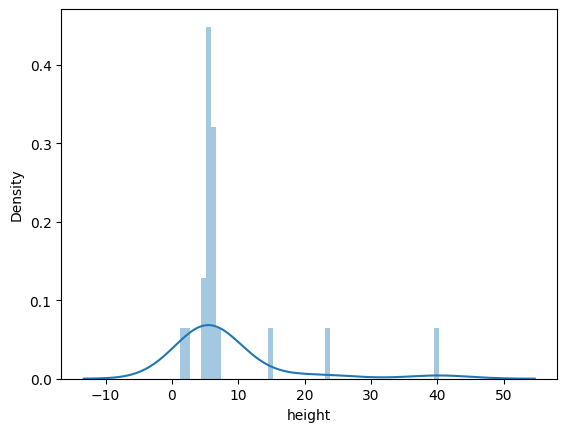

In [12]:
sns.distplot(df['height'])
plt.show()

<h1 style='color:purple'>Detect outliers using IQR<h1>

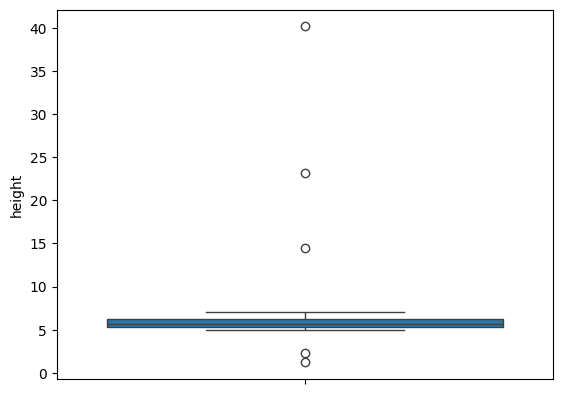

In [14]:
#df.height.
sns.boxplot(y="height", data=df)
plt.show()

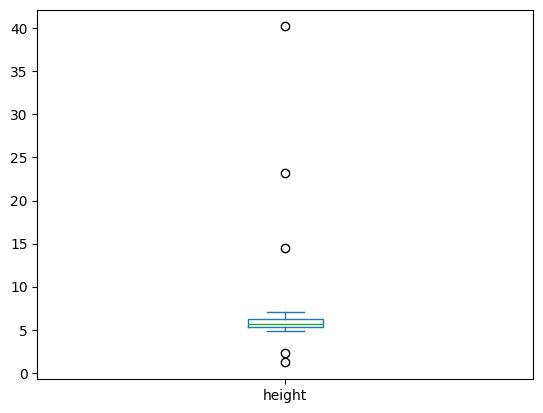

In [15]:
df['height'].plot.box() 
plt.show()

In [16]:
Q1 = df['height'].quantile(0.25)
Q3 = df.height.quantile(0.75)
Q1, Q3

(np.float64(5.3500000000000005), np.float64(6.275))

In [17]:
IQR = Q3 - Q1
IQR

np.float64(0.9249999999999998)

In [18]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

lower_limit, upper_limit

(np.float64(3.962500000000001), np.float64(7.6625))

**Here are the outliers**

In [19]:
outliers = df[(df.height<lower_limit)|(df.height>upper_limit)]
outliers

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liu,40.2


<h3 style='color:purple'>Remove outliers<h3>

In [20]:
df_no_outlier = df[(df.height>=lower_limit)&(df.height<=upper_limit)]
df_no_outlier

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9


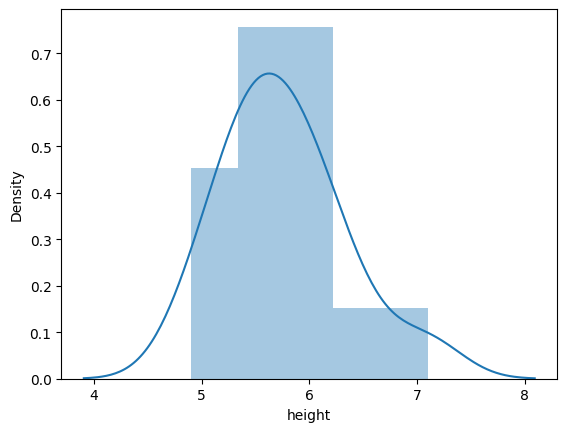

In [21]:
sns.distplot(df_no_outlier['height'])
plt.show()

In [22]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [23]:
Q1 = tips['total_bill'].quantile(0.25)
Q3 = tips['total_bill'].quantile(0.75)
Q1, Q3

(np.float64(13.3475), np.float64(24.127499999999998))

In [24]:
IQR = Q3 - Q1
IQR

np.float64(10.779999999999998)

In [25]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

lower_limit, upper_limit

(np.float64(-2.8224999999999945), np.float64(40.29749999999999))

In [26]:
outliers_of_totalbill = tips[(tips['total_bill']<lower_limit)|(tips['total_bill']>upper_limit)]
outliers_of_totalbill

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [27]:
tips_no_outlier = tips[(tips['total_bill']>=lower_limit)&(tips['total_bill']<=upper_limit)]
tips_no_outlier

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
